<a href="https://colab.research.google.com/github/Vanshikaa1444/Face_mask_detection/blob/main/Face_mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset


In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [7]:
!ls


a2.jpg	data  face-mask-dataset.zip  kaggle.json  sample_data  test2.jpg  test3.jpg  test.jpg


Importing the Dependencies

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_466.jpg', 'with_mask_162.jpg', 'with_mask_3039.jpg', 'with_mask_2550.jpg', 'with_mask_1.jpg']
['with_mask_272.jpg', 'with_mask_335.jpg', 'with_mask_3494.jpg', 'with_mask_996.jpg', 'with_mask_2851.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2932.jpg', 'without_mask_2632.jpg', 'without_mask_1816.jpg', 'without_mask_3203.jpg', 'without_mask_50.jpg']
['without_mask_1729.jpg', 'without_mask_2637.jpg', 'without_mask_791.jpg', 'without_mask_272.jpg', 'without_mask_860.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

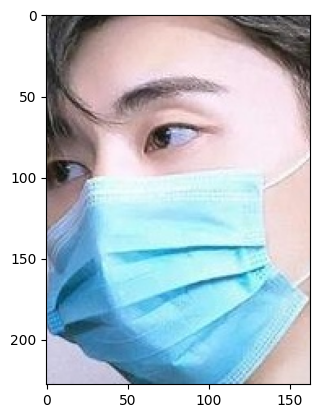

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

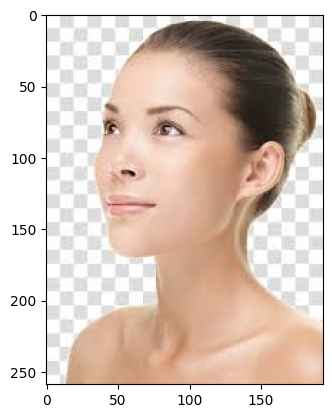

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

In [21]:
data[0]

array([[[ 53,  48,  44],
        [ 61,  56,  52],
        [ 78,  73,  69],
        ...,
        [ 24,  23,  28],
        [ 25,  24,  29],
        [ 25,  24,  29]],

       [[ 71,  66,  62],
        [ 79,  74,  71],
        [ 94,  89,  85],
        ...,
        [ 22,  21,  26],
        [ 22,  21,  26],
        [ 22,  21,  26]],

       [[ 83,  78,  76],
        [ 91,  85,  83],
        [102,  97,  93],
        ...,
        [ 20,  19,  24],
        [ 19,  18,  23],
        [ 19,  18,  23]],

       ...,

       [[ 17,  17,  25],
        [ 18,  17,  25],
        [ 19,  18,  26],
        ...,
        [ 17,  12,  19],
        [ 16,  11,  18],
        [ 16,  11,  18]],

       [[ 19,  17,  25],
        [ 20,  18,  27],
        [ 21,  19,  28],
        ...,
        [ 18,  13,  20],
        [ 19,  14,  21],
        [ 20,  15,  22]],

       [[ 20,  17,  26],
        [ 21,  18,  27],
        [ 22,  19,  28],
        ...,
        [ 18,  13,  20],
        [ 20,  15,  22],
        [ 21,  16,  23]]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [23]:
X_train[0]

array([[[102,  75,  80],
        [ 94,  66,  71],
        [ 81,  56,  61],
        ...,
        [ 55,  32,  38],
        [ 57,  33,  40],
        [ 59,  33,  42]],

       [[ 93,  66,  72],
        [ 86,  59,  64],
        [ 75,  50,  56],
        ...,
        [ 54,  31,  37],
        [ 55,  31,  38],
        [ 58,  32,  41]],

       [[ 85,  58,  65],
        [ 76,  49,  56],
        [ 67,  41,  49],
        ...,
        [ 54,  31,  39],
        [ 54,  31,  39],
        [ 56,  30,  39]],

       ...,

       [[ 90,  67,  61],
        [ 87,  64,  58],
        [ 82,  58,  55],
        ...,
        [ 41,  29,  33],
        [ 40,  28,  32],
        [ 39,  27,  31]],

       [[ 89,  66,  60],
        [ 86,  63,  57],
        [ 82,  58,  54],
        ...,
        [ 41,  29,  33],
        [ 40,  28,  32],
        [ 39,  27,  31]],

       [[ 89,  66,  60],
        [ 86,  63,  57],
        [ 81,  57,  54],
        ...,
        [ 40,  28,  32],
        [ 40,  28,  32],
        [ 39,  27,  31]]

In [24]:
X_train_scaled[0]

array([[[0.4       , 0.29411765, 0.31372549],
        [0.36862745, 0.25882353, 0.27843137],
        [0.31764706, 0.21960784, 0.23921569],
        ...,
        [0.21568627, 0.1254902 , 0.14901961],
        [0.22352941, 0.12941176, 0.15686275],
        [0.23137255, 0.12941176, 0.16470588]],

       [[0.36470588, 0.25882353, 0.28235294],
        [0.3372549 , 0.23137255, 0.25098039],
        [0.29411765, 0.19607843, 0.21960784],
        ...,
        [0.21176471, 0.12156863, 0.14509804],
        [0.21568627, 0.12156863, 0.14901961],
        [0.22745098, 0.1254902 , 0.16078431]],

       [[0.33333333, 0.22745098, 0.25490196],
        [0.29803922, 0.19215686, 0.21960784],
        [0.2627451 , 0.16078431, 0.19215686],
        ...,
        [0.21176471, 0.12156863, 0.15294118],
        [0.21176471, 0.12156863, 0.15294118],
        [0.21960784, 0.11764706, 0.15294118]],

       ...,

       [[0.35294118, 0.2627451 , 0.23921569],
        [0.34117647, 0.25098039, 0.22745098],
        [0.32156863, 0

Building a Convolutional Neural Networks (CNN)

In [25]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [29]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 135s 785ms/step - loss: 0.4557 - acc: 0.7955 - val_loss: 0.2541 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 136s 803ms/step - loss: 0.2824 - acc: 0.8919 - val_loss: 0.2176 - val_acc: 0.9091
Epoch 3/5
170/170 [==============================] - 131s 773ms/step - loss: 0.2467 - acc: 0.9045 - val_loss: 0.2079 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 137s 809ms/step - loss: 0.1998 - acc: 0.9233 - val_loss: 0.1774 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 128s 755ms/step - loss: 0.1607 - acc: 0.9400 - val_loss: 0.1685 - val_acc: 0.9372


Model Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 18s 363ms/step - loss: 0.1922 - acc: 0.9246
Test Accuracy = 0.9245532751083374


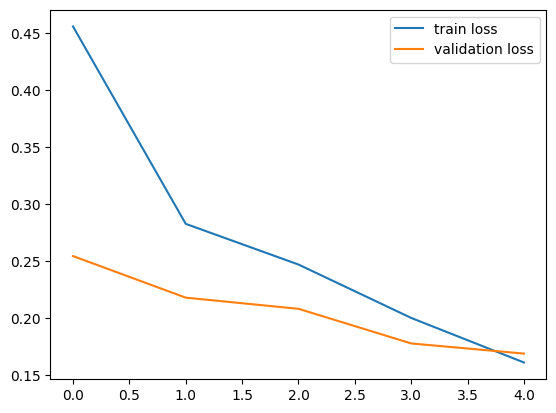

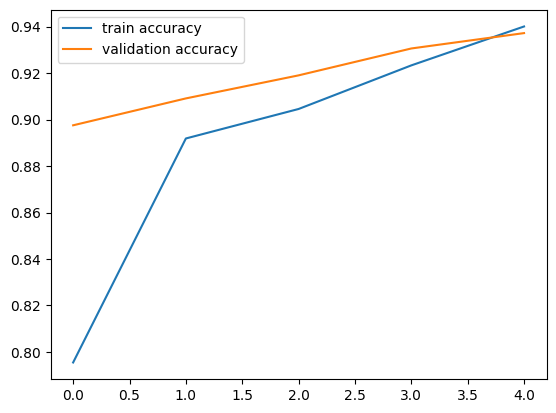

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/test.jpg


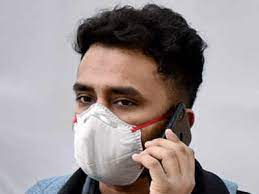

1/1 [==============================] - 0s 29ms/step
[[0.05443232 0.80824   ]]
1
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')